<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW1/4105_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Defining Functions used

In [25]:
def compute_cost(X, y, theta, lambda_value): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * (np.sum(sqrErrors) + lambda_value * np.sum(np.square(theta)))
 
  return J 

In [26]:
def gradient_descent(X, y, theta, alpha, iterations, XV, yV, lambda_value): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
  vCost_history = np.zeros(iterations)
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors) + (lambda_value / m) * theta; 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta, lambda_value)  
    vCost_history[i] = compute_cost(XV,yV, theta, lambda_value) 
 
  return theta, cost_history, vCost_history

Reading Housing Dataset

In [6]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head() # To get first n rows from the dataset default value of n is 5 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
varlist = ['mainroad', 'guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']

# Defining the mapping function
def binary_map(x):
  return x.map({'yes':1,'no':0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Splitting into 80% Training and 20% Validation sets

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
print("Total: ", len(housing), "Training: ", len(df_train)," Validation: ", len(df_test))

Total:  545 Training:  436  Validation:  109


Change this to test other variables

Final value of theta = [2.55527299e-16 3.76694680e-01 9.85653835e-02 2.96066047e-01
 2.32450181e-01 1.62762701e-01]
Final Cost: 0.22327066921450245


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


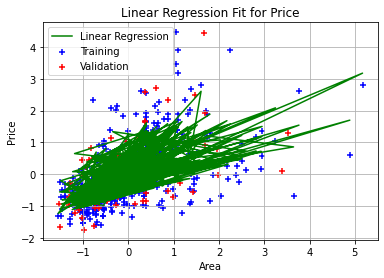

In [51]:
# Standardization


num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-2; 

# Lambda
lambda_value = 1e-1;


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV, lambda_value) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.04896552682468627


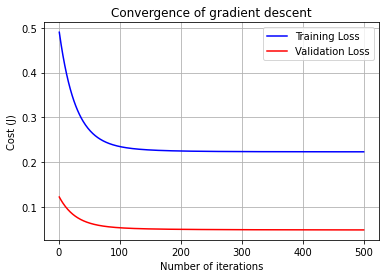

In [52]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 

### Part B

Final value of theta = [2.50257244e-16 2.76837030e-01 6.73777643e-02 2.54174737e-01
 1.92128329e-01 8.83884054e-02 9.03391178e-02 8.21979133e-02
 1.20754303e-01 2.16268678e-01 1.15440057e-01 1.59753189e-01]
Final Cost: 0.16432522866602073


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


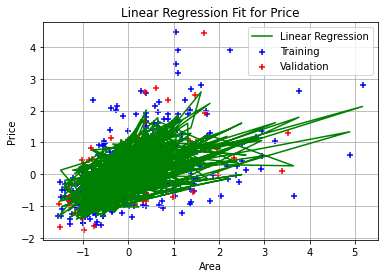

In [55]:
# Standardization


num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking','prefarea', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-2; 

# Lambda
lambda_value = 1e-1;


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV, lambda_value) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.04016637939672736


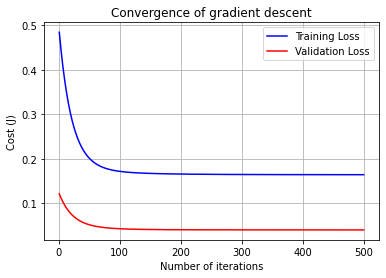

In [56]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 